In [4]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.labelcolor'] = 'green'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.color'] = 'red'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.color'] = 'red'
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.dpi'] = 300
%matplotlib inline

In [5]:
print("Pandas: ", pd.__version__)
print("Numpy: ", np.__version__)
print("Seaborn: ", sns.__version__)
print("Maplotlib: ", mpl.__version__)

Pandas:  0.25.1
Numpy:  1.16.5
Seaborn:  0.9.0
Maplotlib:  3.1.1


`Data Wrangling`

    Gather
    Asses
    Clean

!python -m pip install pandas==0.25.1

#### Pandas
    
    Series
    
    Data Frame

from csv files

    comma seprated values

In [6]:
import os

In [7]:
os.listdir('data')

['311-service-requests.csv',
 'bikes.csv',
 'popularity-contest',
 'README.md',
 'test_db.sqlite',
 'weather_2012.csv',
 'weather_2012.sqlite']

In [8]:
def head(fname, encoding='latin1'):
    with open(fname, encoding=encoding) as file:
        for _ in range(5):
            print(file.readline(), end='')

In [9]:
head('data/bikes.csv')

Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
01/01/2012;35;;0;38;51;26;10;16;
02/01/2012;83;;1;68;153;53;6;43;
03/01/2012;135;;2;104;248;89;3;58;
04/01/2012;144;;1;116;318;111;8;61;


    data set travelling with bikes on different different routes

In [10]:
df = pd.read_csv('data/bikes.csv', sep=';', index_col='Date', dayfirst=True, parse_dates=['Date'], encoding='latin1')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-11-05
Data columns (total 9 columns):
Berri 1                                310 non-null int64
Brébeuf (données non disponibles)      0 non-null float64
Côte-Sainte-Catherine                  310 non-null int64
Maisonneuve 1                          310 non-null int64
Maisonneuve 2                          310 non-null int64
du Parc                                310 non-null int64
Pierre-Dupuy                           310 non-null int64
Rachel1                                310 non-null int64
St-Urbain (données non disponibles)    0 non-null float64
dtypes: float64(2), int64(7)
memory usage: 24.2 KB


## missing data

    null values 

In [13]:
df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


    to check missing values

In [17]:
df.isna().sum(axis=1)

Date
2012-01-01    2
2012-01-02    2
2012-01-03    2
2012-01-04    2
2012-01-05    2
             ..
2012-11-01    2
2012-11-02    2
2012-11-03    2
2012-11-04    2
2012-11-05    2
Length: 310, dtype: int64

In [18]:
df.isna().sum(axis=0)

Berri 1                                  0
Brébeuf (données non disponibles)      310
Côte-Sainte-Catherine                    0
Maisonneuve 1                            0
Maisonneuve 2                            0
du Parc                                  0
Pierre-Dupuy                             0
Rachel1                                  0
St-Urbain (données non disponibles)    310
dtype: int64

In [20]:
df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [21]:
df.drop('Brébeuf (données non disponibles)', axis=1)

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,
2012-01-01,35,0,38,51,26,10,16,NaN
2012-01-02,83,1,68,153,53,6,43,NaN
2012-01-03,135,2,104,248,89,3,58,NaN
2012-01-04,144,1,116,318,111,8,61,NaN
2012-01-05,197,2,124,330,97,13,95,NaN


In [22]:
df.drop('Brébeuf (données non disponibles)', axis=1, inplace=True)

In [23]:
df.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,
2012-01-01,35,0,38,51,26,10,16,NaN
2012-01-02,83,1,68,153,53,6,43,NaN
2012-01-03,135,2,104,248,89,3,58,NaN
2012-01-04,144,1,116,318,111,8,61,NaN
2012-01-05,197,2,124,330,97,13,95,NaN


In [27]:
df.drop('St-Urbain (données non disponibles)', axis=1, inplace=True)

In [28]:
df.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


In [43]:
df = pd.read_csv('data/bikes.csv', sep=';', index_col='Date', dayfirst=True, 
              parse_dates=['Date'],encoding='latin1', usecols=[0, 1, 3, 4, 5, 6, 7, 8],
                )

In [44]:
df.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


In [45]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [31]:
!head data/bikes.csv

Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
01/01/2012;35;;0;38;51;26;10;16;
02/01/2012;83;;1;68;153;53;6;43;
03/01/2012;135;;2;104;248;89;3;58;
04/01/2012;144;;1;116;318;111;8;61;
05/01/2012;197;;2;124;330;97;13;95;
06/01/2012;146;;0;98;244;86;4;75;
07/01/2012;98;;2;80;108;53;6;54;
08/01/2012;95;;1;62;98;64;11;63;
09/01/2012;244;;2;165;432;198;12;173;


In [46]:
df.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


#### Selection

by `label` or by `index`

In [48]:
farzi = pd.DataFrame({
    'name': ['ram', 'rheem', 'krishn', 'geeta', 'seeta'],
    'gender': [ 'male', 'male', 'male', 'female', 'female']
},
    index=['one', 'two', 'three', 'four', 'five']
)

In [49]:
farzi

,name,gender
one,ram,male
two,rheem,male
three,krishn,male
four,geeta,female
five,seeta,female


`column selection`

    single column
    
    multiple column

In [50]:
farzi

,name,gender
one,ram,male
two,rheem,male
three,krishn,male
four,geeta,female
five,seeta,female


In [52]:
farzi['name'] # as a series

one         ram
two       rheem
three    krishn
four      geeta
five      seeta
Name: name, dtype: object

`Multiple clumn selection`

In [54]:
farzi[['name', 'gender']] # as data frame

,name,gender
one,ram,male
two,rheem,male
three,krishn,male
four,geeta,female
five,seeta,female


In [56]:
farzi[['name']] # data frame

,name
one,ram
two,rheem
three,krishn
four,geeta
five,seeta


### Row Selection

In [58]:
farzi

,name,gender
one,ram,male
two,rheem,male
three,krishn,male
four,geeta,female
five,seeta,female


In [64]:
farzi[1:3] # key -> column

,name,gender
two,rheem,male
three,krishn,male


In [65]:
farzi[0:1]

,name,gender
one,ram,male


In [67]:
farzi[-5:]

,name,gender
one,ram,male
two,rheem,male
three,krishn,male
four,geeta,female
five,seeta,female


#### selection of data



In [80]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.style'] = 'italic'

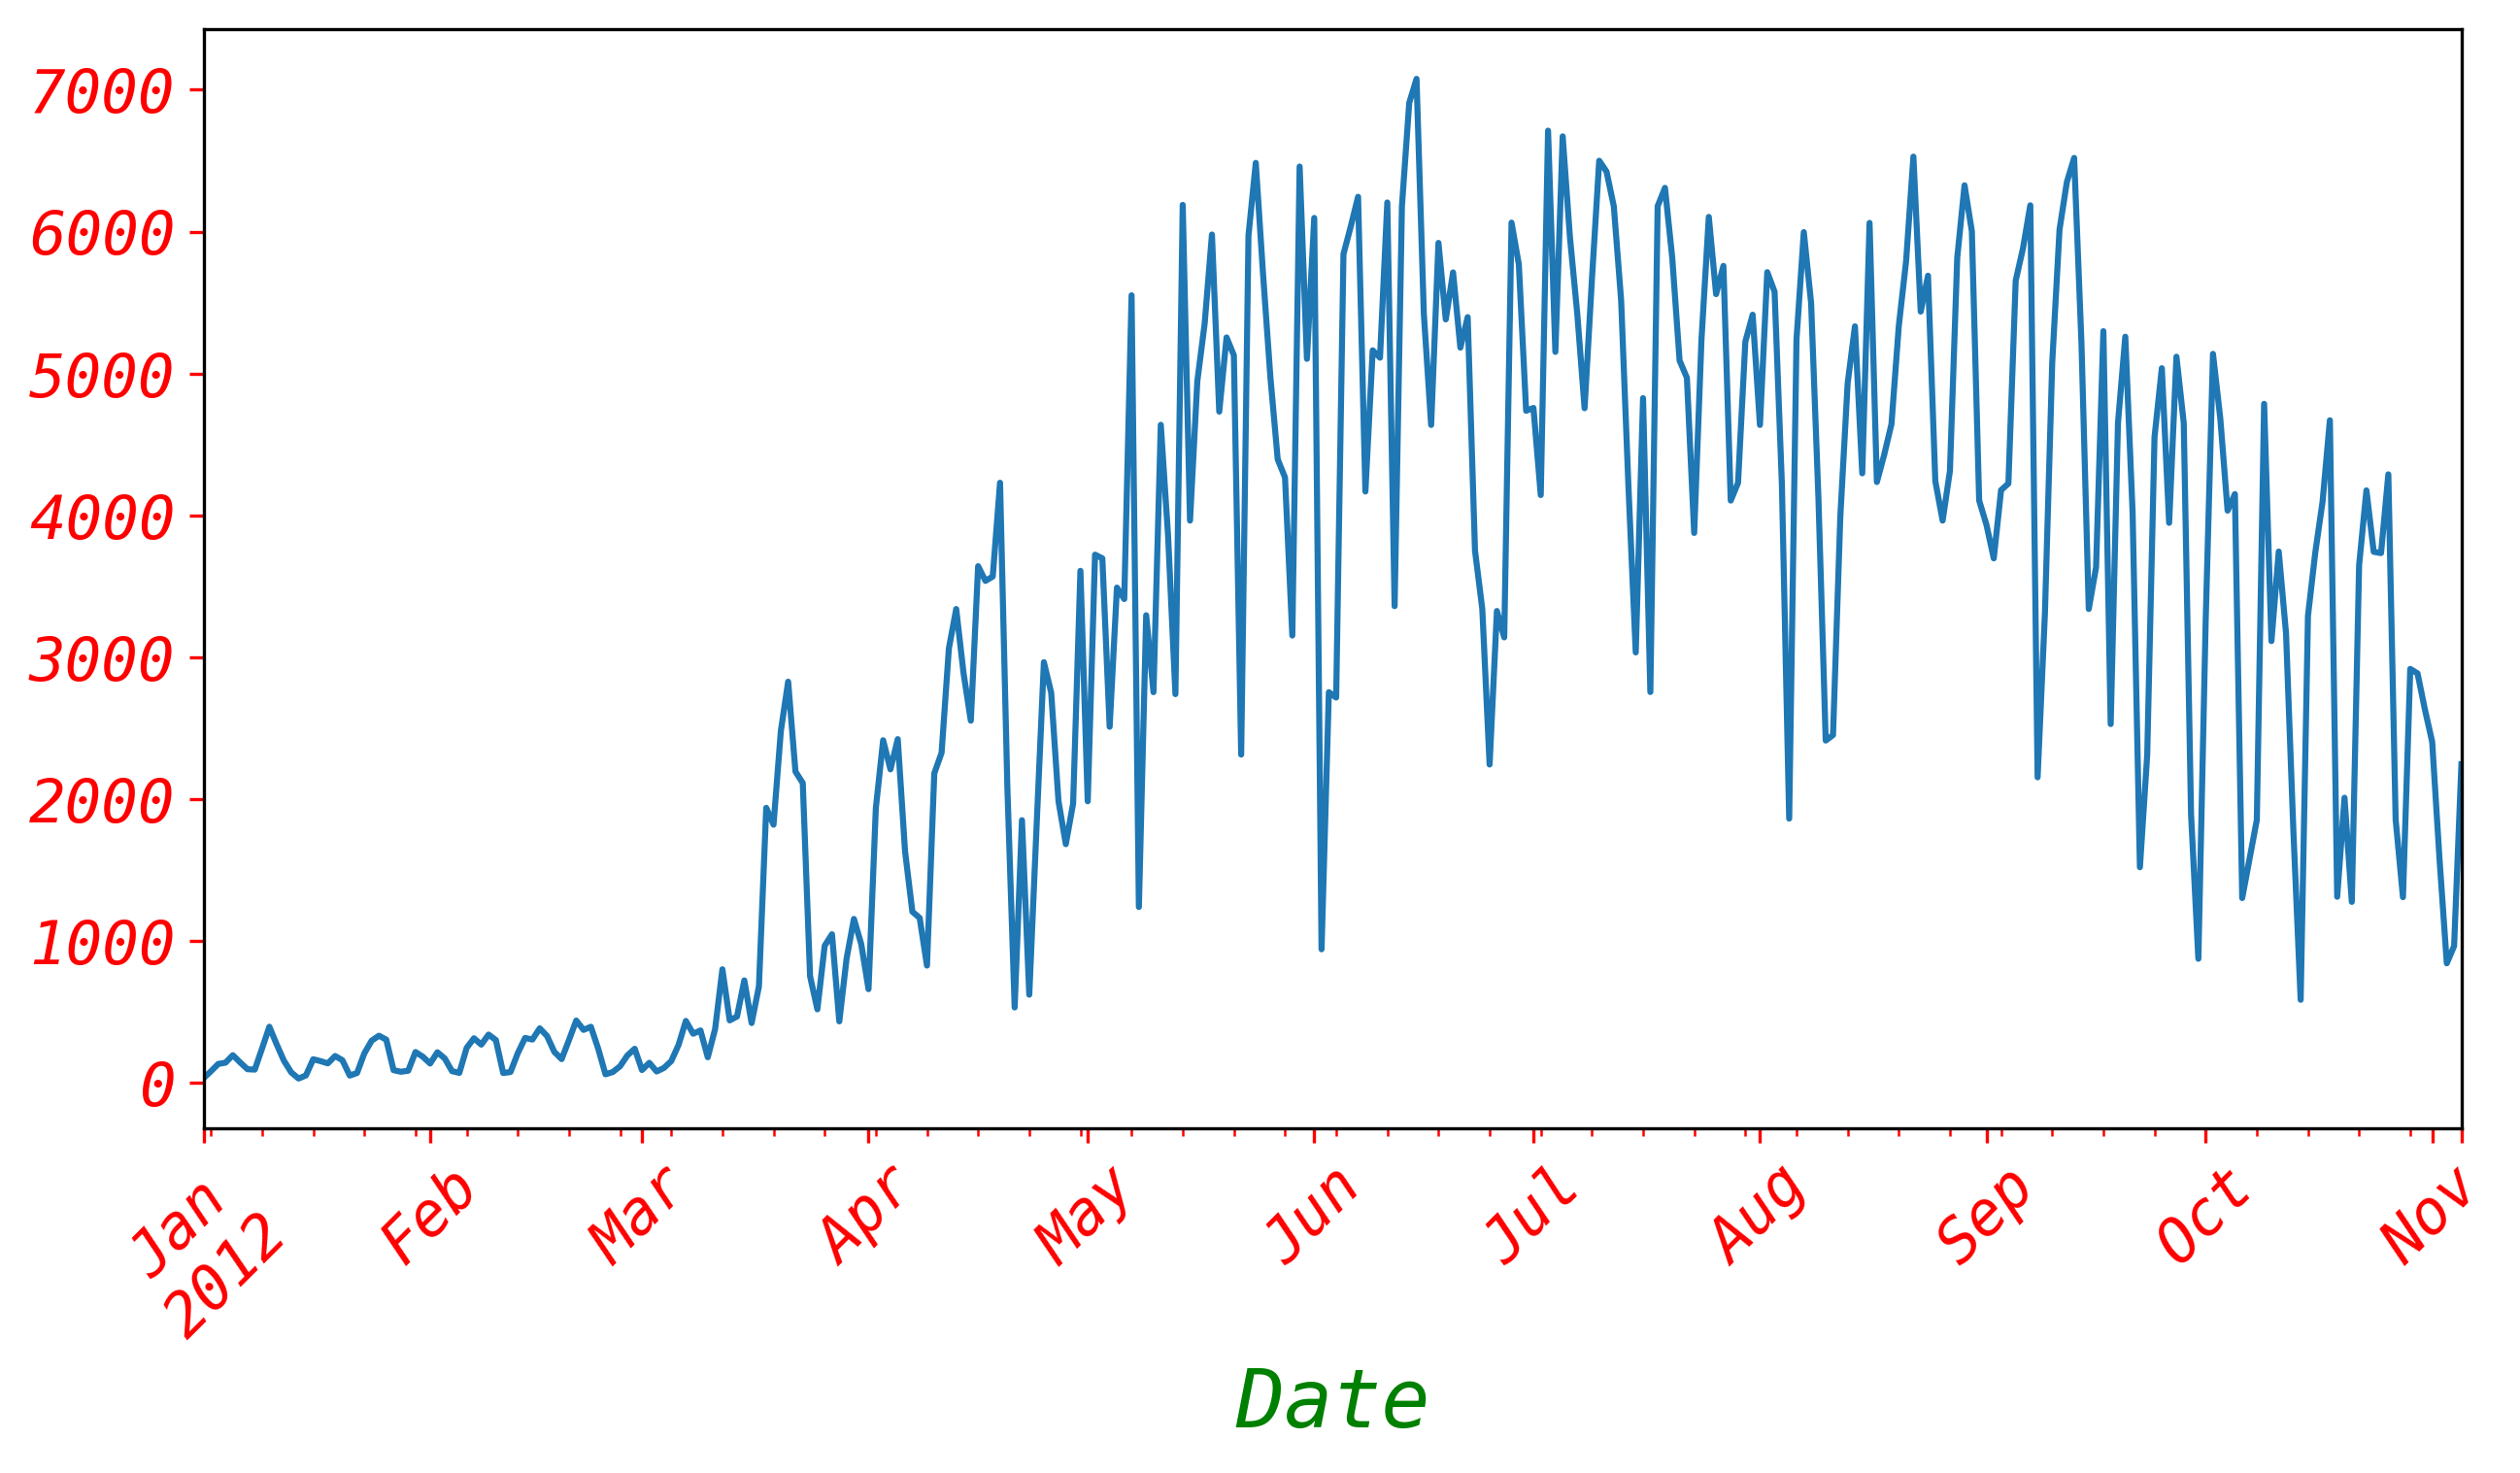

In [82]:
df['Berri 1'].plot()
plt.xticks(rotation='45')
plt.show()

In [83]:
df.columns

Index(['Berri 1', 'Côte-Sainte-Catherine', 'Maisonneuve 1', 'Maisonneuve 2',
       'du Parc', 'Pierre-Dupuy', 'Rachel1'],
      dtype='object')

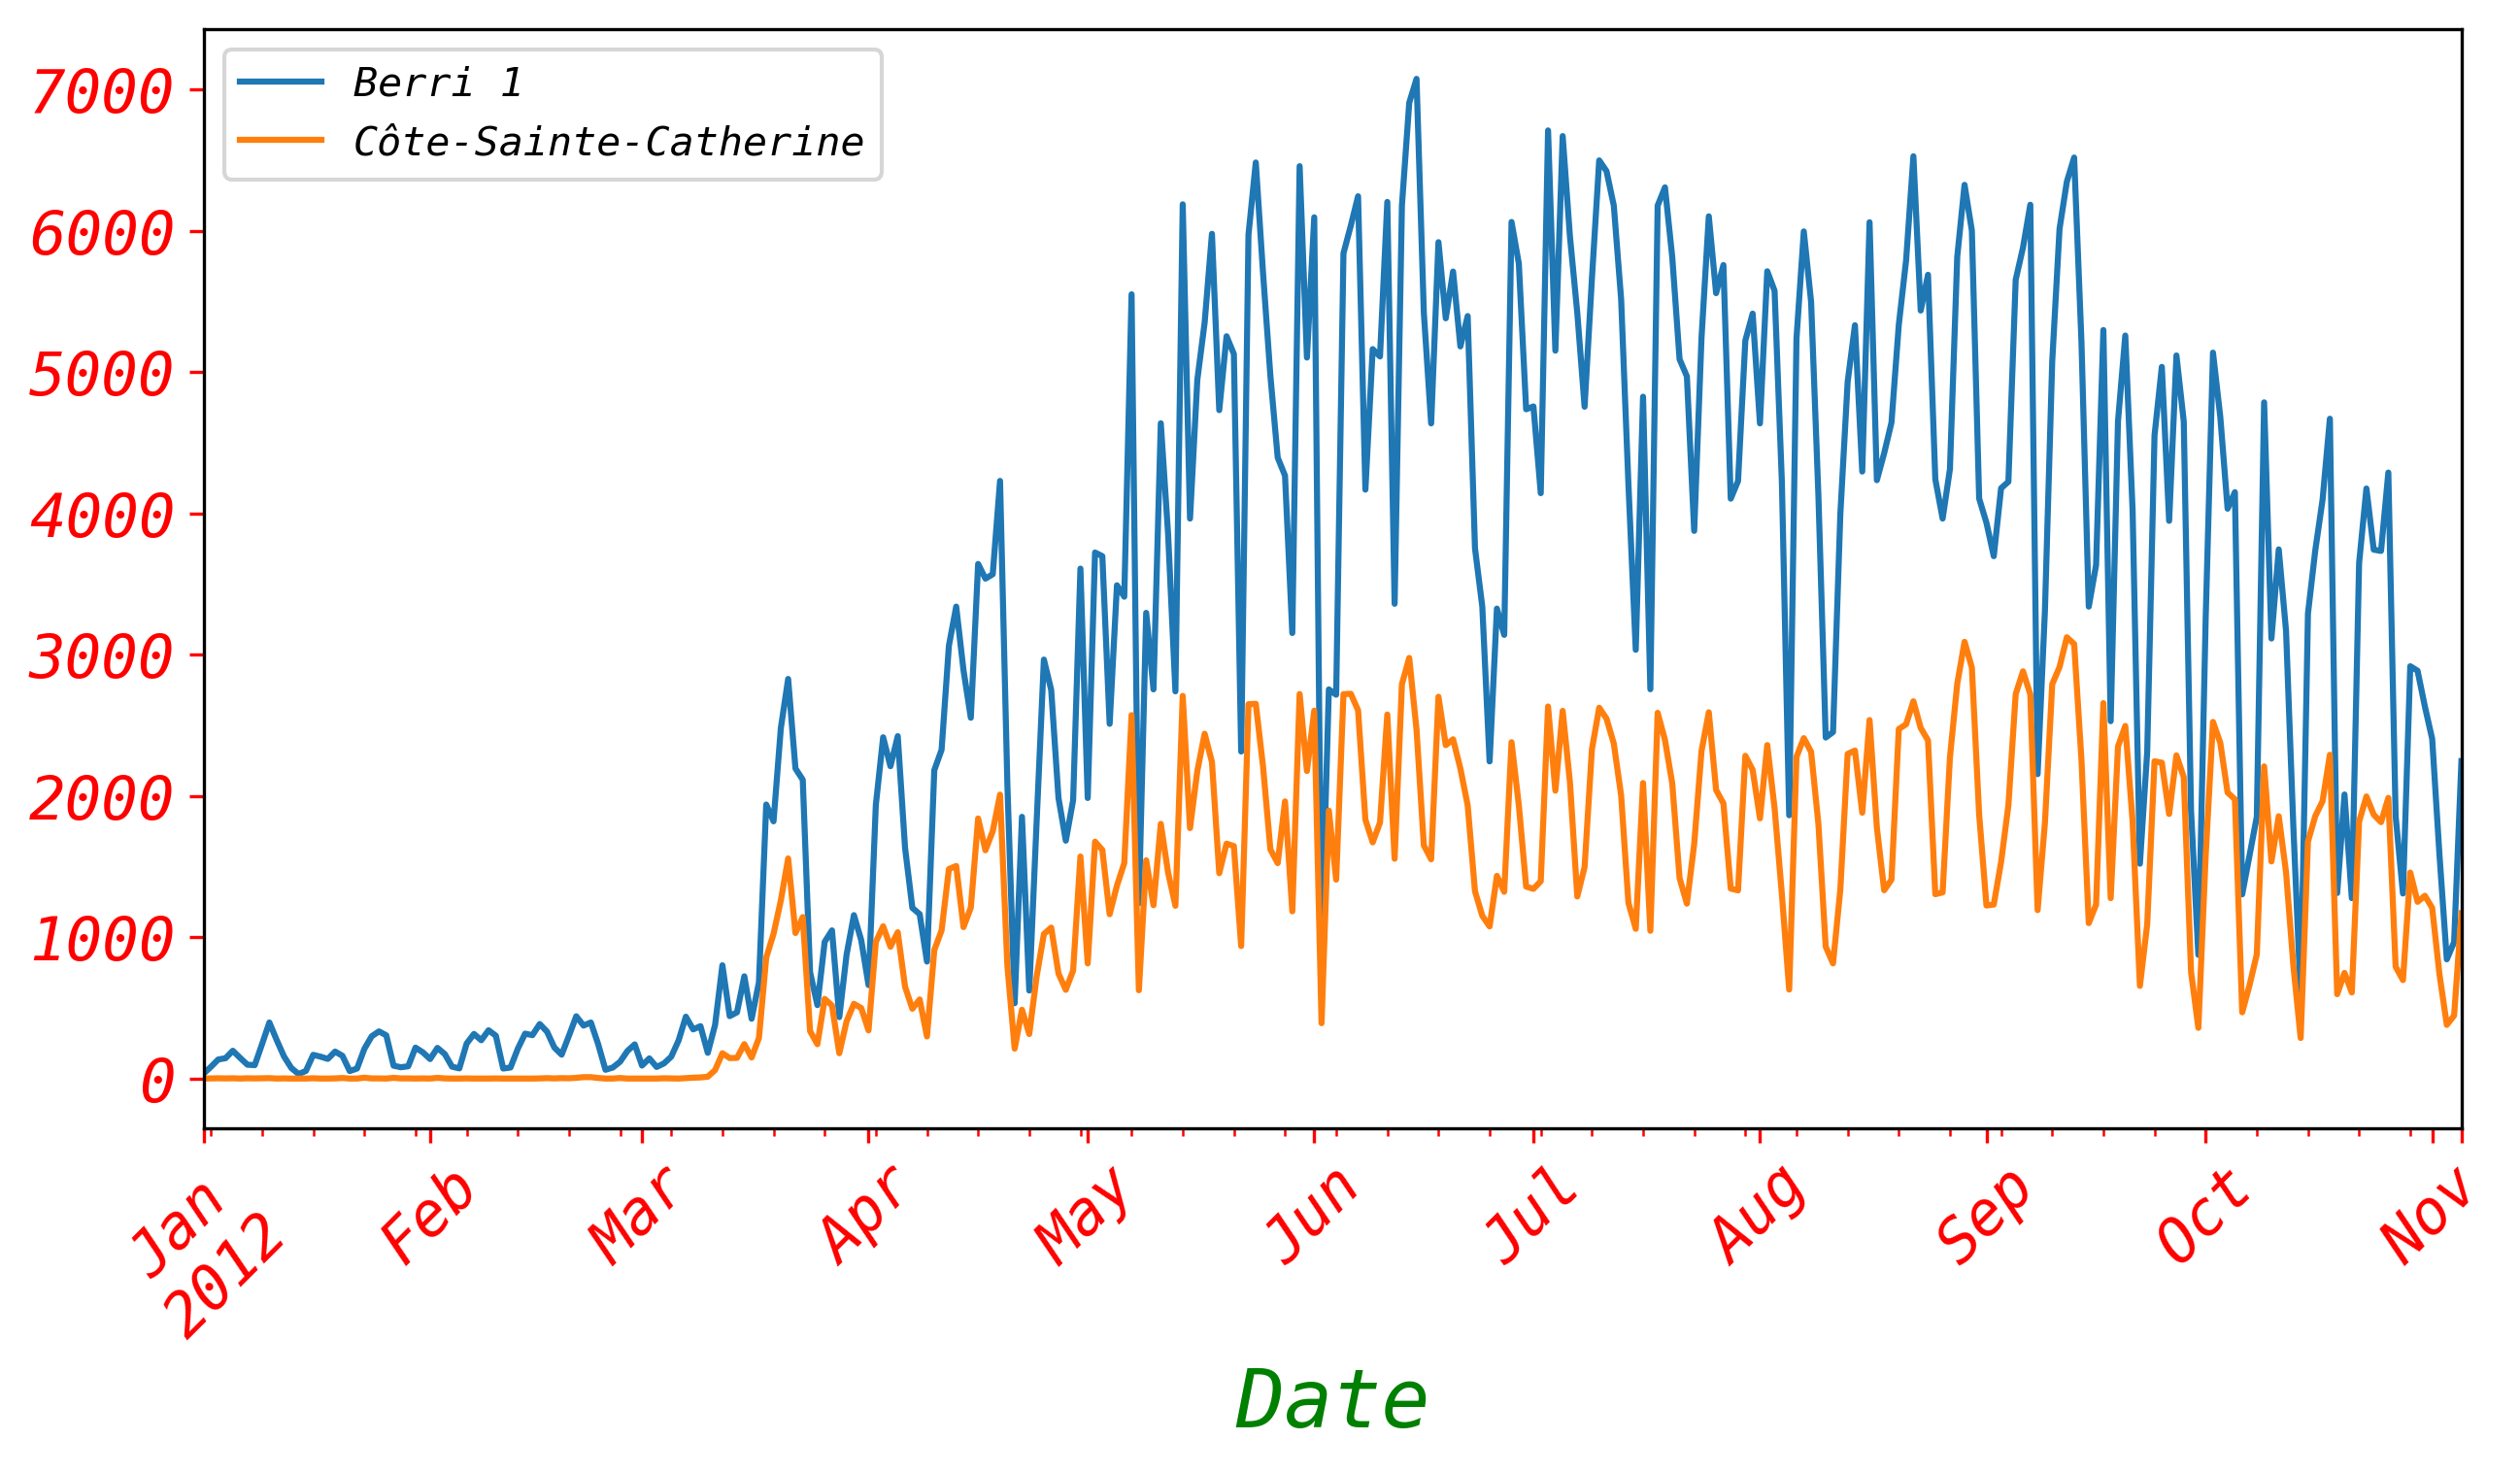

In [86]:
df[['Berri 1', 'Côte-Sainte-Catherine']].plot()
plt.xticks(rotation='45')
plt.show()

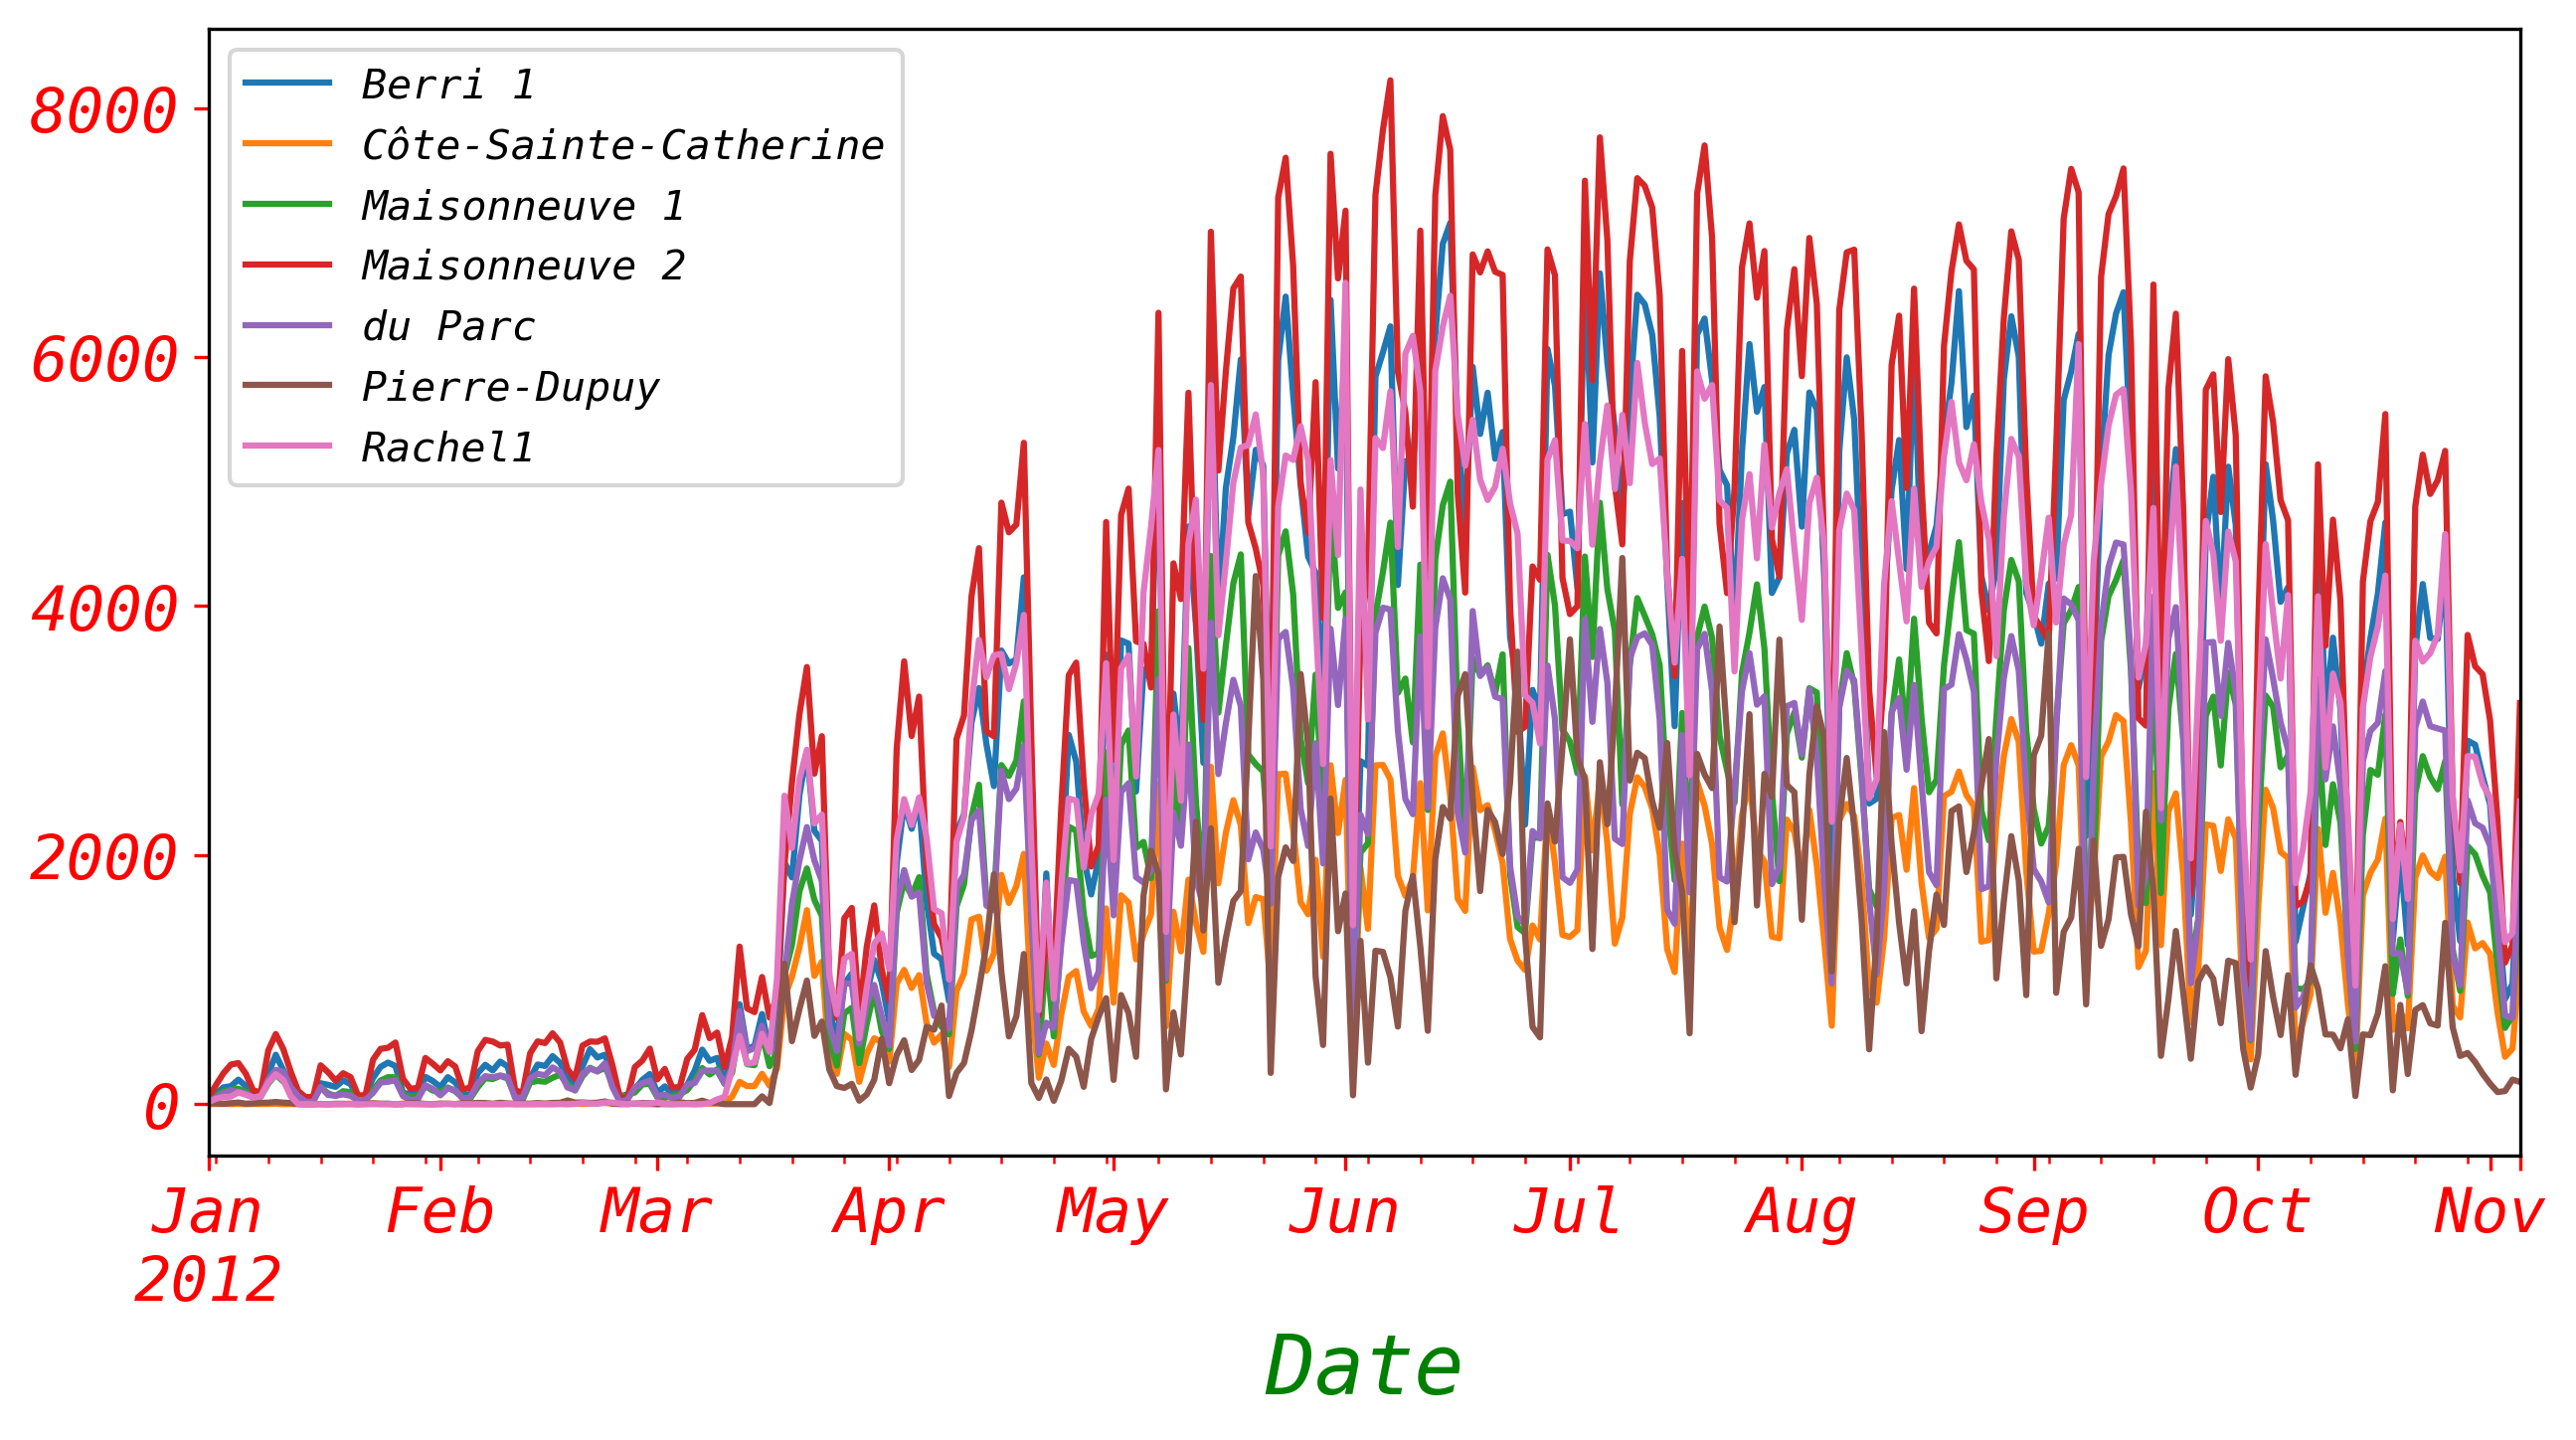

In [87]:
df.plot()
plt.show()

In [89]:
df[::10]

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-11,273,0,182,443,258,12,194
2012-01-21,53,0,47,70,32,1,0
2012-01-31,186,1,109,324,122,0,0
2012-02-10,303,1,206,478,216,6,2
2012-02-20,303,2,224,470,243,14,10
2012-03-01,92,0,56,199,63,0,14
2012-03-11,380,60,253,540,289,0,285
2012-03-21,2829,1558,1893,3510,2225,993,2846


In [91]:
farzi

,name,gender
one,ram,male
two,rheem,male
three,krishn,male
four,geeta,female
five,seeta,female


#### loc uses index labels and column name to select data

In [94]:
farzi = pd.DataFrame(np.random.randint(10, 30, 50).reshape(10, 5),
                     columns=['A', 'B', 'C', 'D', 'E'],
                    index=['one', 'two', 'three', 'four', 'five', 'six', 'seven', 
                          'eight', 'nine', 'ten'])

In [95]:
farzi

,A,B,C,D,E
one,28,15,28,28,15
two,13,19,22,27,12
three,21,10,16,18,16
four,14,20,14,28,18
five,15,22,23,14,13
six,15,19,25,23,14
seven,23,13,26,19,22
eight,15,25,20,25,19
nine,16,15,19,28,26
ten,21,16,12,19,24


In [96]:
farzi.loc['one':'ten':2, 'A':'E':2]

,A,C,E
one,28,28,15
three,21,16,16
five,15,23,13
seven,23,26,22
nine,16,19,26


In [98]:
farzi.loc['five':'nine', ]

,A,B,C,D,E
five,15,22,23,14,13
six,15,19,25,23,14
seven,23,13,26,19,22
eight,15,25,20,25,19
nine,16,15,19,28,26


In [100]:
farzi.loc[:, 'A':'C']

,A,B,C
one,28,15,28
two,13,19,22
three,21,10,16
four,14,20,14
five,15,22,23
six,15,19,25
seven,23,13,26
eight,15,25,20
nine,16,15,19
ten,21,16,12


In [101]:
farzi.loc[::2, ::2]

,A,C,E
one,28,28,15
three,21,16,16
five,15,23,13
seven,23,26,22
nine,16,19,26


In [104]:
farzi.loc[['one', 'five', 'six', 'nine',],]

,A,B,C,D,E
one,28,15,28,28,15
five,15,22,23,14,13
six,15,19,25,23,14
nine,16,15,19,28,26


In [105]:
farzi.loc[:,['A', 'D', 'E']]

,A,D,E
one,28,28,15
two,13,27,12
three,21,18,16
four,14,28,18
five,15,14,13
six,15,23,14
seven,23,19,22
eight,15,25,19
nine,16,28,26
ten,21,19,24


In [106]:
farzi.loc[['one', 'three', 'four', 'seven', 'nine'], ['A', 'B', 'E']]

,A,B,E
one,28,15,15
three,21,10,16
four,14,20,18
seven,23,13,22
nine,16,15,26


In [108]:
#farzi[1:5, 1:3]  # default indexing

In [109]:
df.head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


    y-d-m month first

    y-m-d day first

In [112]:
df.loc['2012-07-01':'2012-07-31', ['Berri 1', 'Rachel1']].head()

,Berri 1,Rachel1
Date,,
2012-07-01,4758,4522
2012-07-02,4144,4464
2012-07-03,6712,5462
2012-07-04,5153,4493
2012-07-05,6672,5153


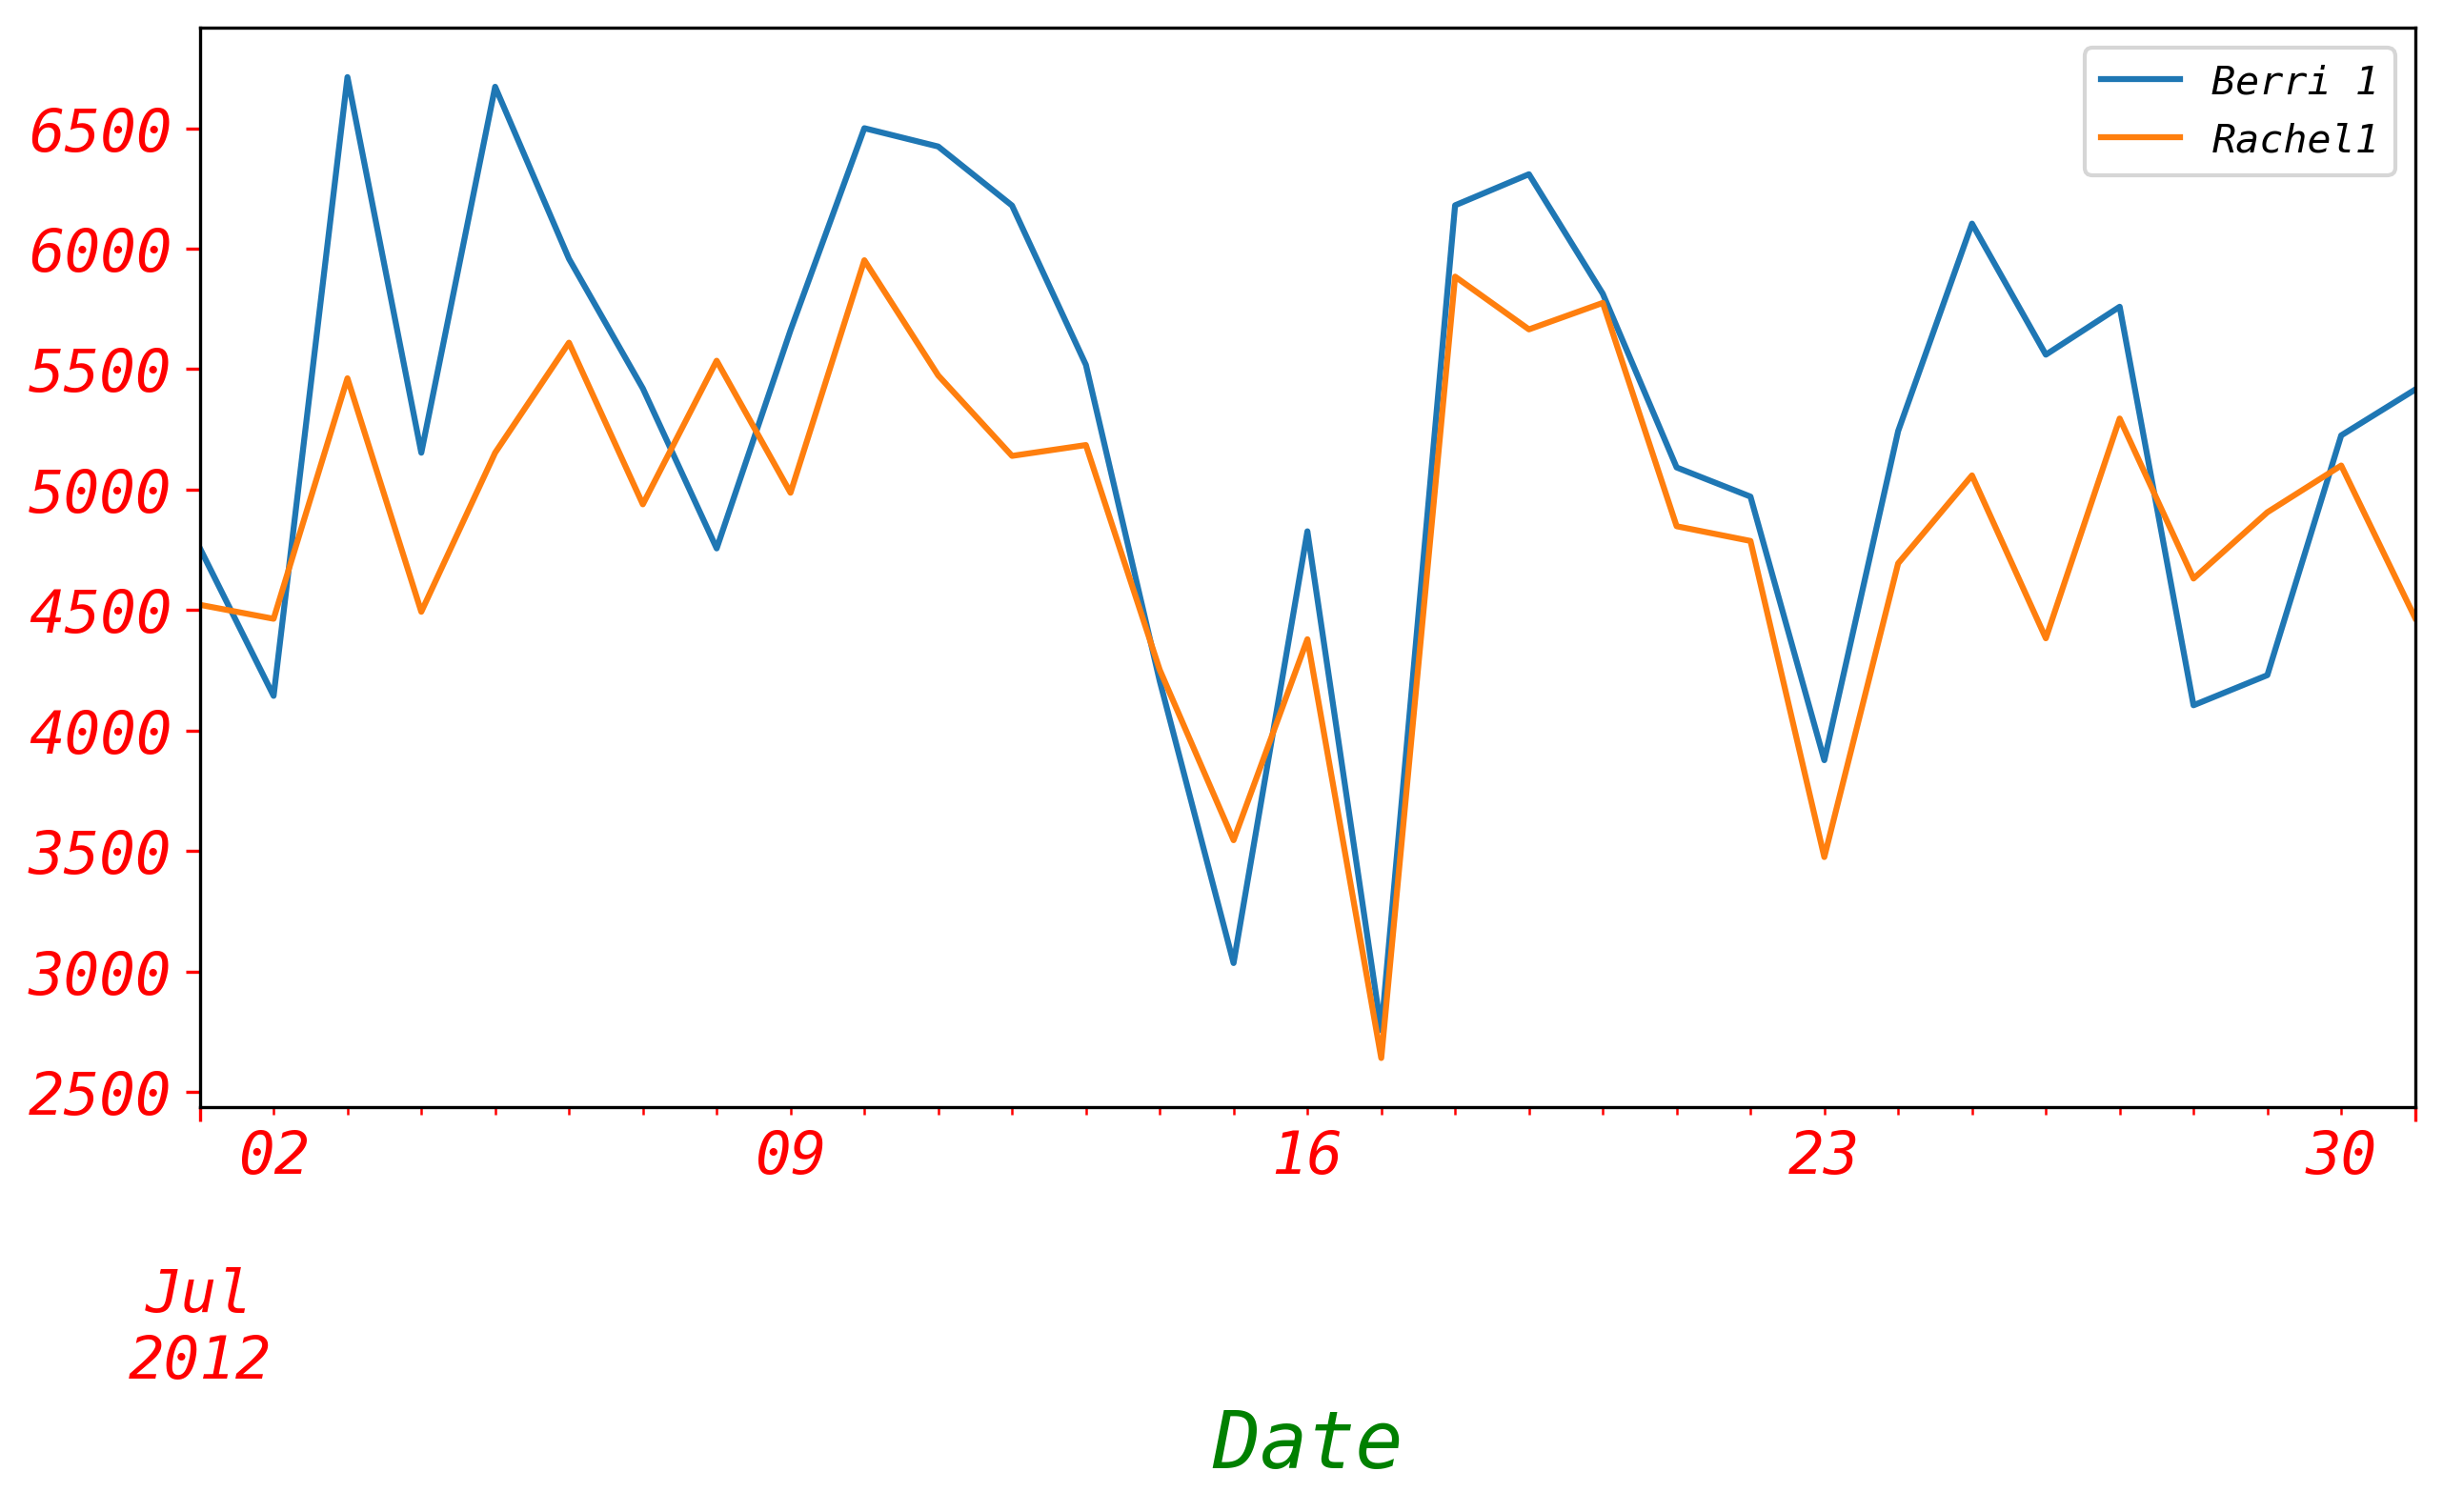

In [113]:
df.loc['2012-07-01':'2012-07-31', ['Berri 1', 'Rachel1']].plot()
plt.show()

jan 1, 2, 3, 4, 45, sum, mean, std
feb 1, 2, 3,4 ,45, mean, std

sex - male -> survive 0 1 1 0 1 0 1 0 1 0 1 0 1 -> 45 mean/sum, std ? yerror ? 

In [131]:
df.loc['2012-01-31', 'Berri 1']

186

## iloc just like default indexing

In [124]:
pd.set_option('max_columns', 60)

In [128]:
complaints = pd.read_csv('data/311-service-requests.csv', parse_dates=['Created Date', 'Closed Date', 'Due Date'],
                        dayfirst=True)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [129]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,2013-10-31 02:08:41,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,2013-10-31 10:08:41,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,2013-10-31 02:01:04,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,2013-10-31 10:01:04,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,2013-10-31 02:00:24,2013-10-31 02:40:32,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,2013-10-31 10:00:24,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,2013-10-31 01:56:23,2013-10-31 02:21:48,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,2013-10-31 09:56:23,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,2013-10-31 01:53:44,NaT,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,2013-11-30 01:53:44,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [121]:
complaints.shape

(111069, 52)

In [122]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
Unique Key                        111069 non-null int64
Created Date                      111069 non-null datetime64[ns]
Closed Date                       60270 non-null object
Agency                            111069 non-null object
Agency Name                       111069 non-null object
Complaint Type                    111069 non-null object
Descriptor                        110613 non-null object
Location Type                     79022 non-null object
Incident Zip                      98807 non-null object
Incident Address                  84441 non-null object
Street Name                       84432 non-null object
Cross Street 1                    84728 non-null object
Cross Street 2                    84005 non-null object
Intersection Street 1             19364 non-null object
Intersection Street 2             19366 non-null object
Address Type                      10

In [136]:
complaints['Created Date']

0        2013-10-31 02:08:41
1        2013-10-31 02:01:04
2        2013-10-31 02:00:24
3        2013-10-31 01:56:23
4        2013-10-31 01:53:44
                 ...        
111064   2013-04-10 00:01:13
111065   2013-04-10 00:01:05
111066   2013-04-10 00:00:45
111067   2013-04-10 00:00:28
111068   2013-04-10 00:00:10
Name: Created Date, Length: 111069, dtype: datetime64[ns]

In [137]:
farzi

,A,B,C,D,E
one,28,15,28,28,15
two,13,19,22,27,12
three,21,10,16,18,16
four,14,20,14,28,18
five,15,22,23,14,13
six,15,19,25,23,14
seven,23,13,26,19,22
eight,15,25,20,25,19
nine,16,15,19,28,26
ten,21,16,12,19,24


In [138]:
farzi.iloc[1:5, 1:4]

,B,C,D
two,19,22,27
three,10,16,18
four,20,14,28
five,22,23,14


In [140]:
farzi.iloc[::-1, ::-1]

,E,D,C,B,A
ten,24,19,12,16,21
nine,26,28,19,15,16
eight,19,25,20,25,15
seven,22,19,26,13,23
six,14,23,25,19,15
five,13,14,23,22,15
four,18,28,14,20,14
three,16,18,16,10,21
two,12,27,22,19,13
one,15,28,28,15,28


In [141]:
farzi.iloc[[0, 5, 7, 3], [3, 2, 0]]

,D,C,A
one,28,28,28
six,23,25,15
eight,25,20,15
four,28,14,14


In [144]:
farzi

,A,B,C,D,E
one,28,15,28,28,15
two,13,19,22,27,12
three,21,10,16,18,16
four,14,20,14,28,18
five,15,22,23,14,13
six,15,19,25,23,14
seven,23,13,26,19,22
eight,15,25,20,25,19
nine,16,15,19,28,26
ten,21,16,12,19,24


In [146]:
farzi.iloc[4, 3] # single

14

In [147]:
df.columns

Index(['Berri 1', 'Côte-Sainte-Catherine', 'Maisonneuve 1', 'Maisonneuve 2',
       'du Parc', 'Pierre-Dupuy', 'Rachel1'],
      dtype='object')

In [148]:

df.loc['2012-01-01':'2012-01-31', ['Berri 1', 'Rachel1']]

,Berri 1,Rachel1
Date,,
2012-01-01,35,16
2012-01-02,83,43
2012-01-03,135,58
2012-01-04,144,61
2012-01-05,197,95
2012-01-06,146,75
2012-01-07,98,54
2012-01-08,95,63
2012-01-09,244,173


In [149]:
%%timeit
df.loc['2012-01-01':'2012-01-31', ['Berri 1', 'Rachel1']]

1.36 ms ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [151]:
%%timeit
df.iloc[:31, [0, -1]]

549 µs ± 27.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [152]:
%%timeit
df.loc['2012-01-31', 'Berri 1']

363 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [153]:
df.at['2012-01-31', 'Berri 1'] # label

186

In [154]:
%%timeit
df.at['2012-01-31', 'Berri 1'] # label

165 µs ± 2.11 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [156]:
df.iloc[30, 0]

186

In [157]:
%%timeit
df.iloc[30, 0]

8.46 µs ± 298 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [158]:
%%timeit
df.iat[30, 0]

5.27 µs ± 294 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Selection

In [160]:
import time
import tqdm

for _ in tqdm.tqdm(range(300)):
    time.sleep(1)

100%|███████████████████████████████████████████████████████████████████████| 300/300 [05:00<00:00,  1.00s/it]


#### Boolean Selection

In [162]:
farzi

,A,B,C,D,E
one,28,15,28,28,15
two,13,19,22,27,12
three,21,10,16,18,16
four,14,20,14,28,18
five,15,22,23,14,13
six,15,19,25,23,14
seven,23,13,26,19,22
eight,15,25,20,25,19
nine,16,15,19,28,26
ten,21,16,12,19,24


In [167]:
farzi[(farzi['A'] > 20) & (farzi['C'] > 18)]


,A,B,C,D,E
one,28,15,28,28,15
seven,23,13,26,19,22


In [172]:
 df['Berri 1'].quantile([0.75])

0.75    4973.25
Name: Berri 1, dtype: float64

In [173]:
df[df['Berri 1'] > 4973.25]

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-05-07,5552,2573,3959,6355,3416,1848,5253
2012-05-14,6189,2709,4402,7006,3868,2215,5775
2012-05-17,5351,2441,4182,6551,3408,1631,4988
2012-05-18,5980,2241,4415,6646,3196,1711,5273
2012-05-20,5255,1663,2730,4462,2182,4241,5539
...,...,...,...,...,...,...,...
2012-09-17,5299,2658,3670,6582,4076,1704,4788
2012-09-20,5260,2496,3615,6348,3991,1391,5119
2012-09-25,5038,2236,3273,5861,3712,1007,4420


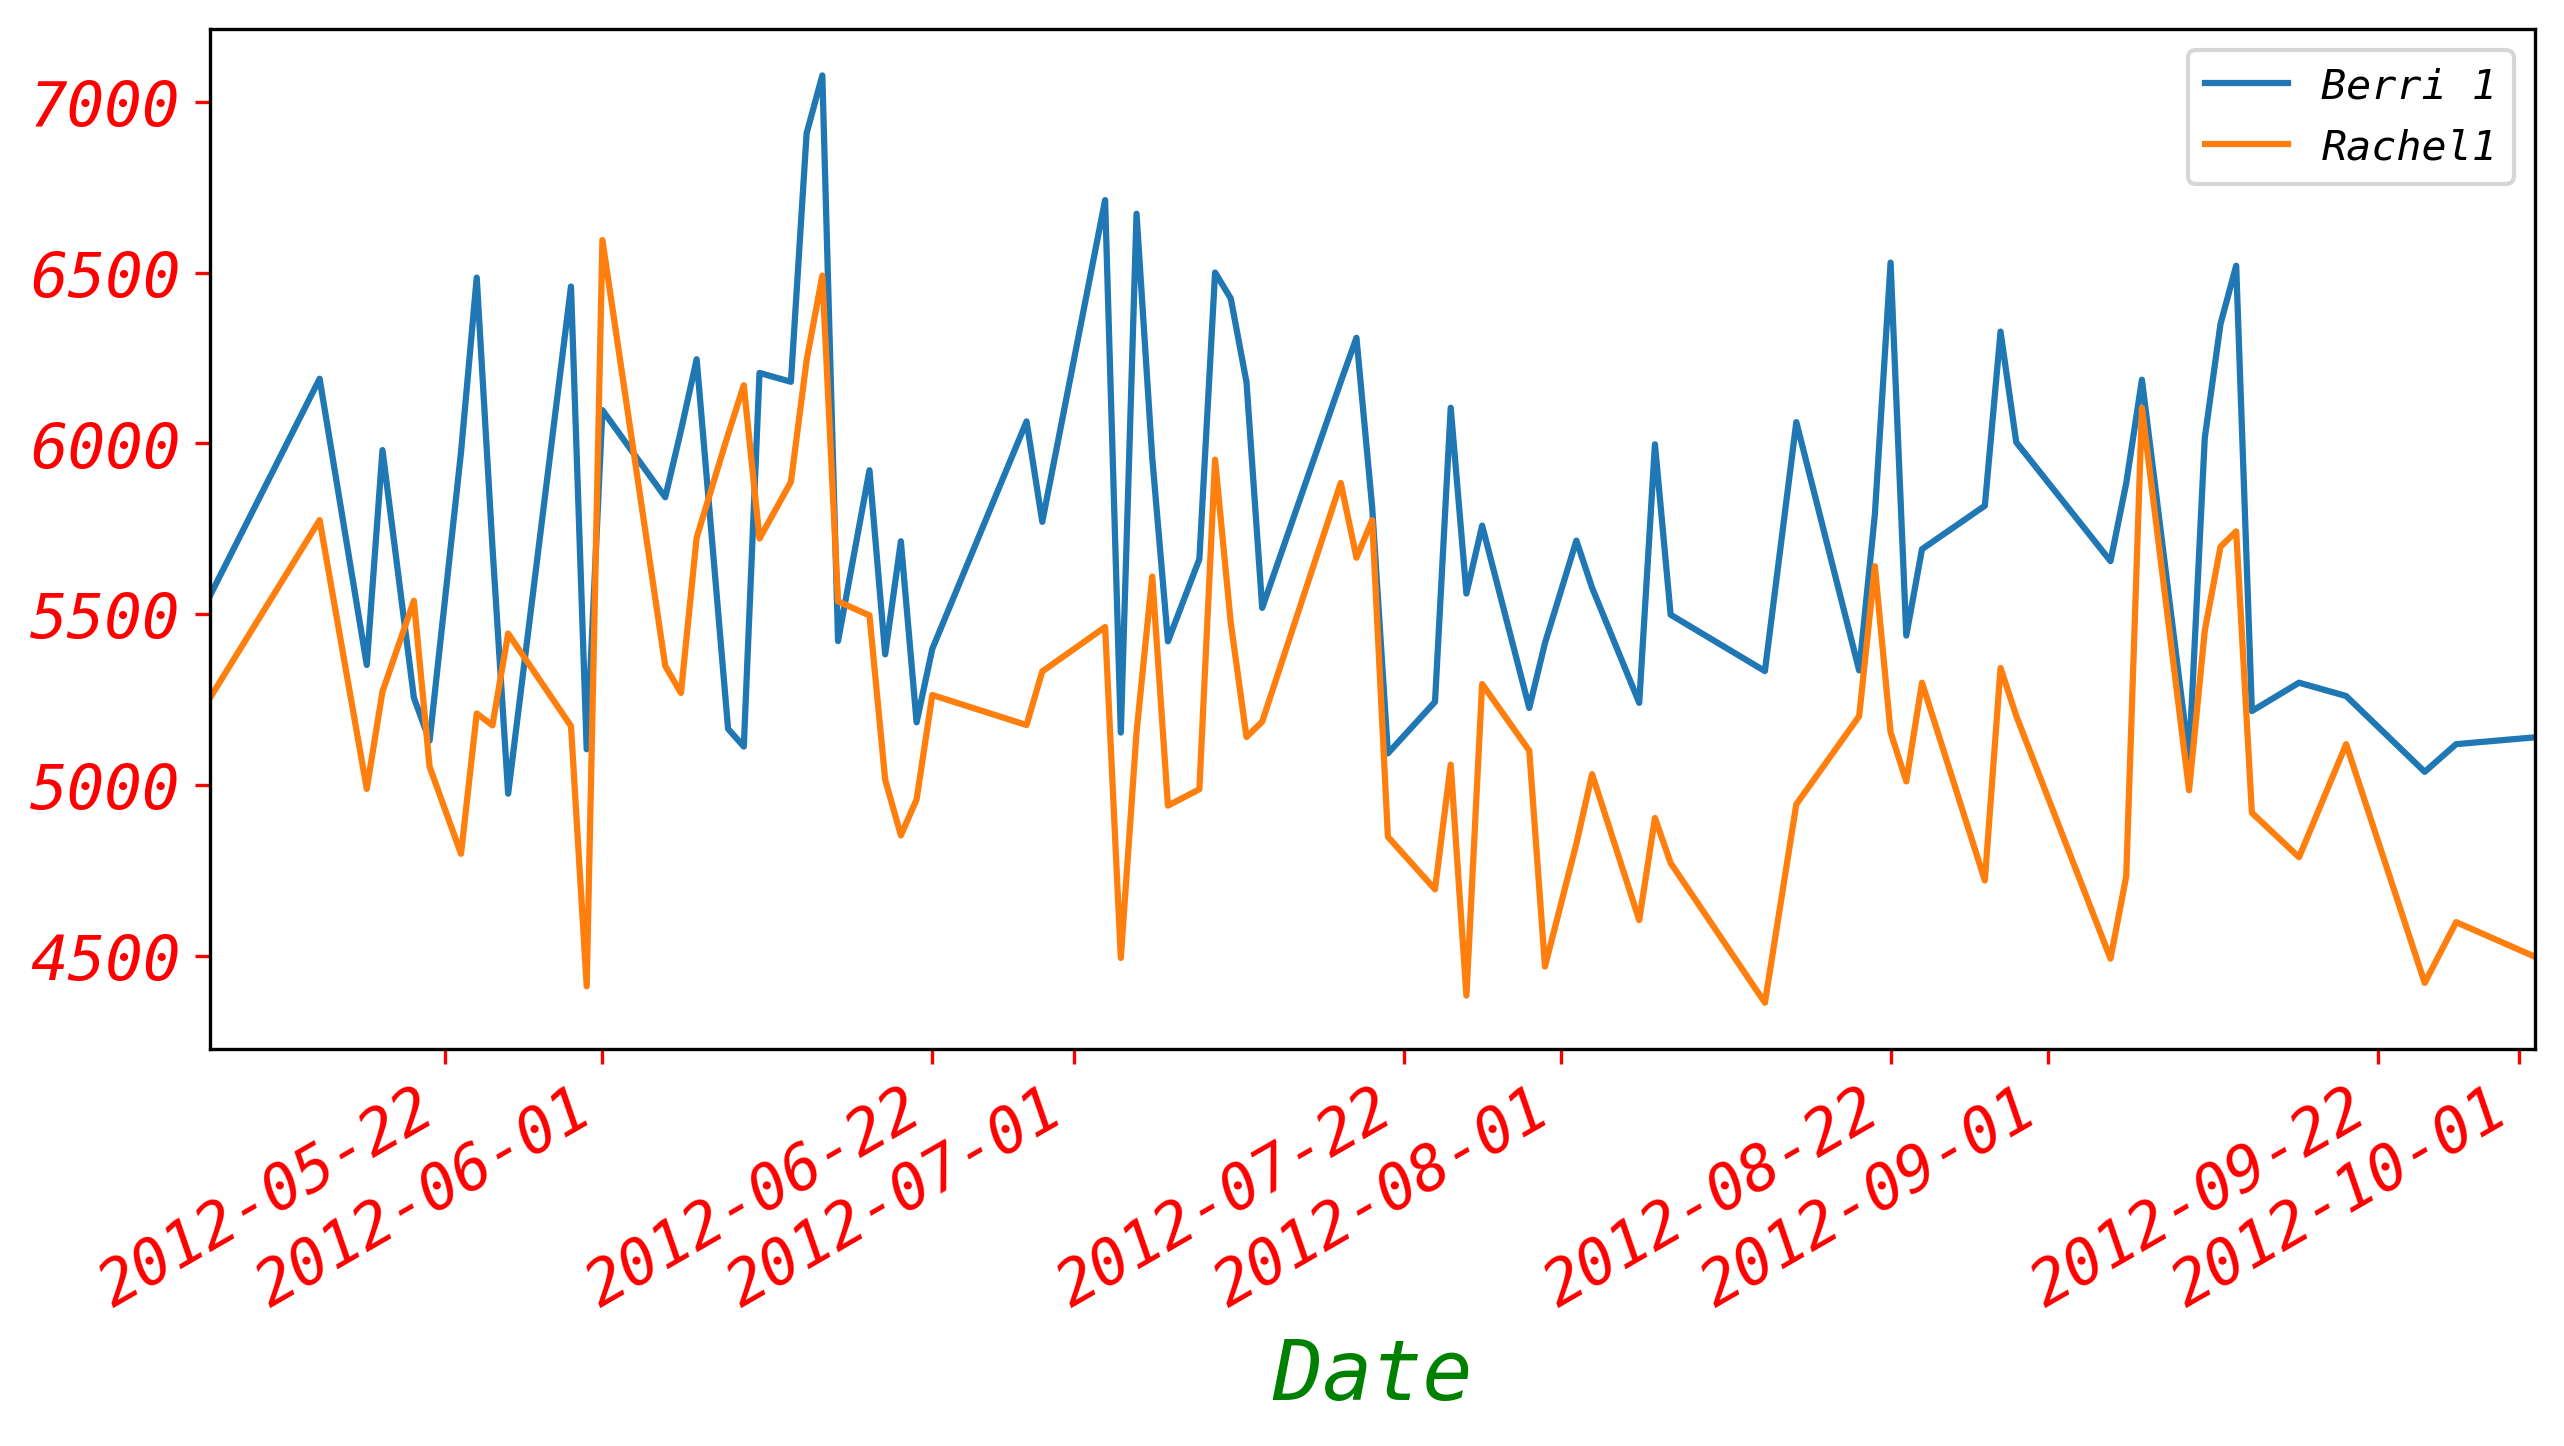

In [178]:
df[df['Berri 1'] > 4973.25][['Berri 1', 'Rachel1']].plot()

### Updatation

In [179]:
farzi

,A,B,C,D,E
one,28,15,28,28,15
two,13,19,22,27,12
three,21,10,16,18,16
four,14,20,14,28,18
five,15,22,23,14,13
six,15,19,25,23,14
seven,23,13,26,19,22
eight,15,25,20,25,19
nine,16,15,19,28,26
ten,21,16,12,19,24


In [181]:
farzi.loc['five', 'B'] = 100

In [182]:
farzi

,A,B,C,D,E
one,28,15,28,28,15
two,13,19,22,27,12
three,21,10,16,18,16
four,14,20,14,28,18
five,15,100,23,14,13
six,15,19,25,23,14
seven,23,13,26,19,22
eight,15,25,20,25,19
nine,16,15,19,28,26
ten,21,16,12,19,24


In [184]:
farzi[farzi['A']> 20] += 5

In [185]:
farzi

,A,B,C,D,E
one,33,20,33,33,20
two,13,19,22,27,12
three,26,15,21,23,21
four,14,20,14,28,18
five,15,100,23,14,13
six,15,19,25,23,14
seven,28,18,31,24,27
eight,15,25,20,25,19
nine,16,15,19,28,26
ten,26,21,17,24,29


In [189]:
farzi.loc[:,'A+B'] = farzi['A'] + farzi['B']

In [190]:
farzi.head()

,A,B,C,D,E,A+B
one,33,20,33,33,20,53
two,13,19,22,27,12,32
three,26,15,21,23,21,41
four,14,20,14,28,18,34
five,15,100,23,14,13,115


In [191]:
farzi.loc[:, 'F'] = farzi.index

In [192]:
farzi

,A,B,C,D,E,A+B,F
one,33,20,33,33,20,53,one
two,13,19,22,27,12,32,two
three,26,15,21,23,21,41,three
four,14,20,14,28,18,34,four
five,15,100,23,14,13,115,five
six,15,19,25,23,14,34,six
seven,28,18,31,24,27,46,seven
eight,15,25,20,25,19,40,eight
nine,16,15,19,28,26,31,nine
ten,26,21,17,24,29,47,ten


In [193]:
farzi.index = range(10)

In [194]:
farzi

,A,B,C,D,E,A+B,F
0,33,20,33,33,20,53,one
1,13,19,22,27,12,32,two
2,26,15,21,23,21,41,three
3,14,20,14,28,18,34,four
4,15,100,23,14,13,115,five
5,15,19,25,23,14,34,six
6,28,18,31,24,27,46,seven
7,15,25,20,25,19,40,eight
8,16,15,19,28,26,31,nine
9,26,21,17,24,29,47,ten


In [195]:
farzi.columns

Index(['A', 'B', 'C', 'D', 'E', 'A+B', 'F'], dtype='object')

In [197]:
farzi.rename({'A':'a', 'B':'b', 'C':'c', 'D': 'd', 'A+B': 'a+b', 'E': 'e', 'F': 'f'}, axis=1, inplace=True)

In [198]:
farzi

,a,b,c,d,e,a+b,f
0,33,20,33,33,20,53,one
1,13,19,22,27,12,32,two
2,26,15,21,23,21,41,three
3,14,20,14,28,18,34,four
4,15,100,23,14,13,115,five
5,15,19,25,23,14,34,six
6,28,18,31,24,27,46,seven
7,15,25,20,25,19,40,eight
8,16,15,19,28,26,31,nine
9,26,21,17,24,29,47,ten


In [199]:
df

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95
...,...,...,...,...,...,...,...
2012-11-01,2405,1208,1701,3082,2076,165,2461
2012-11-02,1582,737,1109,2277,1392,97,1888
2012-11-03,844,380,612,1137,713,105,1302


In [204]:
df.index.weekday_name

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday',
       ...
       'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'Monday'],
      dtype='object', name='Date', length=310)

In [205]:
berri = df[['Berri 1']]

In [207]:
berri.loc[:, 'WeekDay'] = berri.index.weekday_name

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [208]:
berri

,Berri 1,WeekDay
Date,,
2012-01-01,35,Sunday
2012-01-02,83,Monday
2012-01-03,135,Tuesday
2012-01-04,144,Wednesday
2012-01-05,197,Thursday
...,...,...
2012-11-01,2405,Thursday
2012-11-02,1582,Friday
2012-11-03,844,Saturday


In [219]:
d = { 'Sunday':0, 'Monday':0, 'Tuesday': 0, 'Wednesday': 0, 'Thursday': 0, 'Friday': 0, 'Saturday': 0}

for day in d:
    d[day] = berri[berri['WeekDay']==day]['Berri 1'].sum()

In [220]:
d

{'Sunday': 99310,
 'Monday': 134298,
 'Tuesday': 135305,
 'Wednesday': 152972,
 'Thursday': 160131,
 'Friday': 141771,
 'Saturday': 101578}

<BarContainer object of 7 artists>

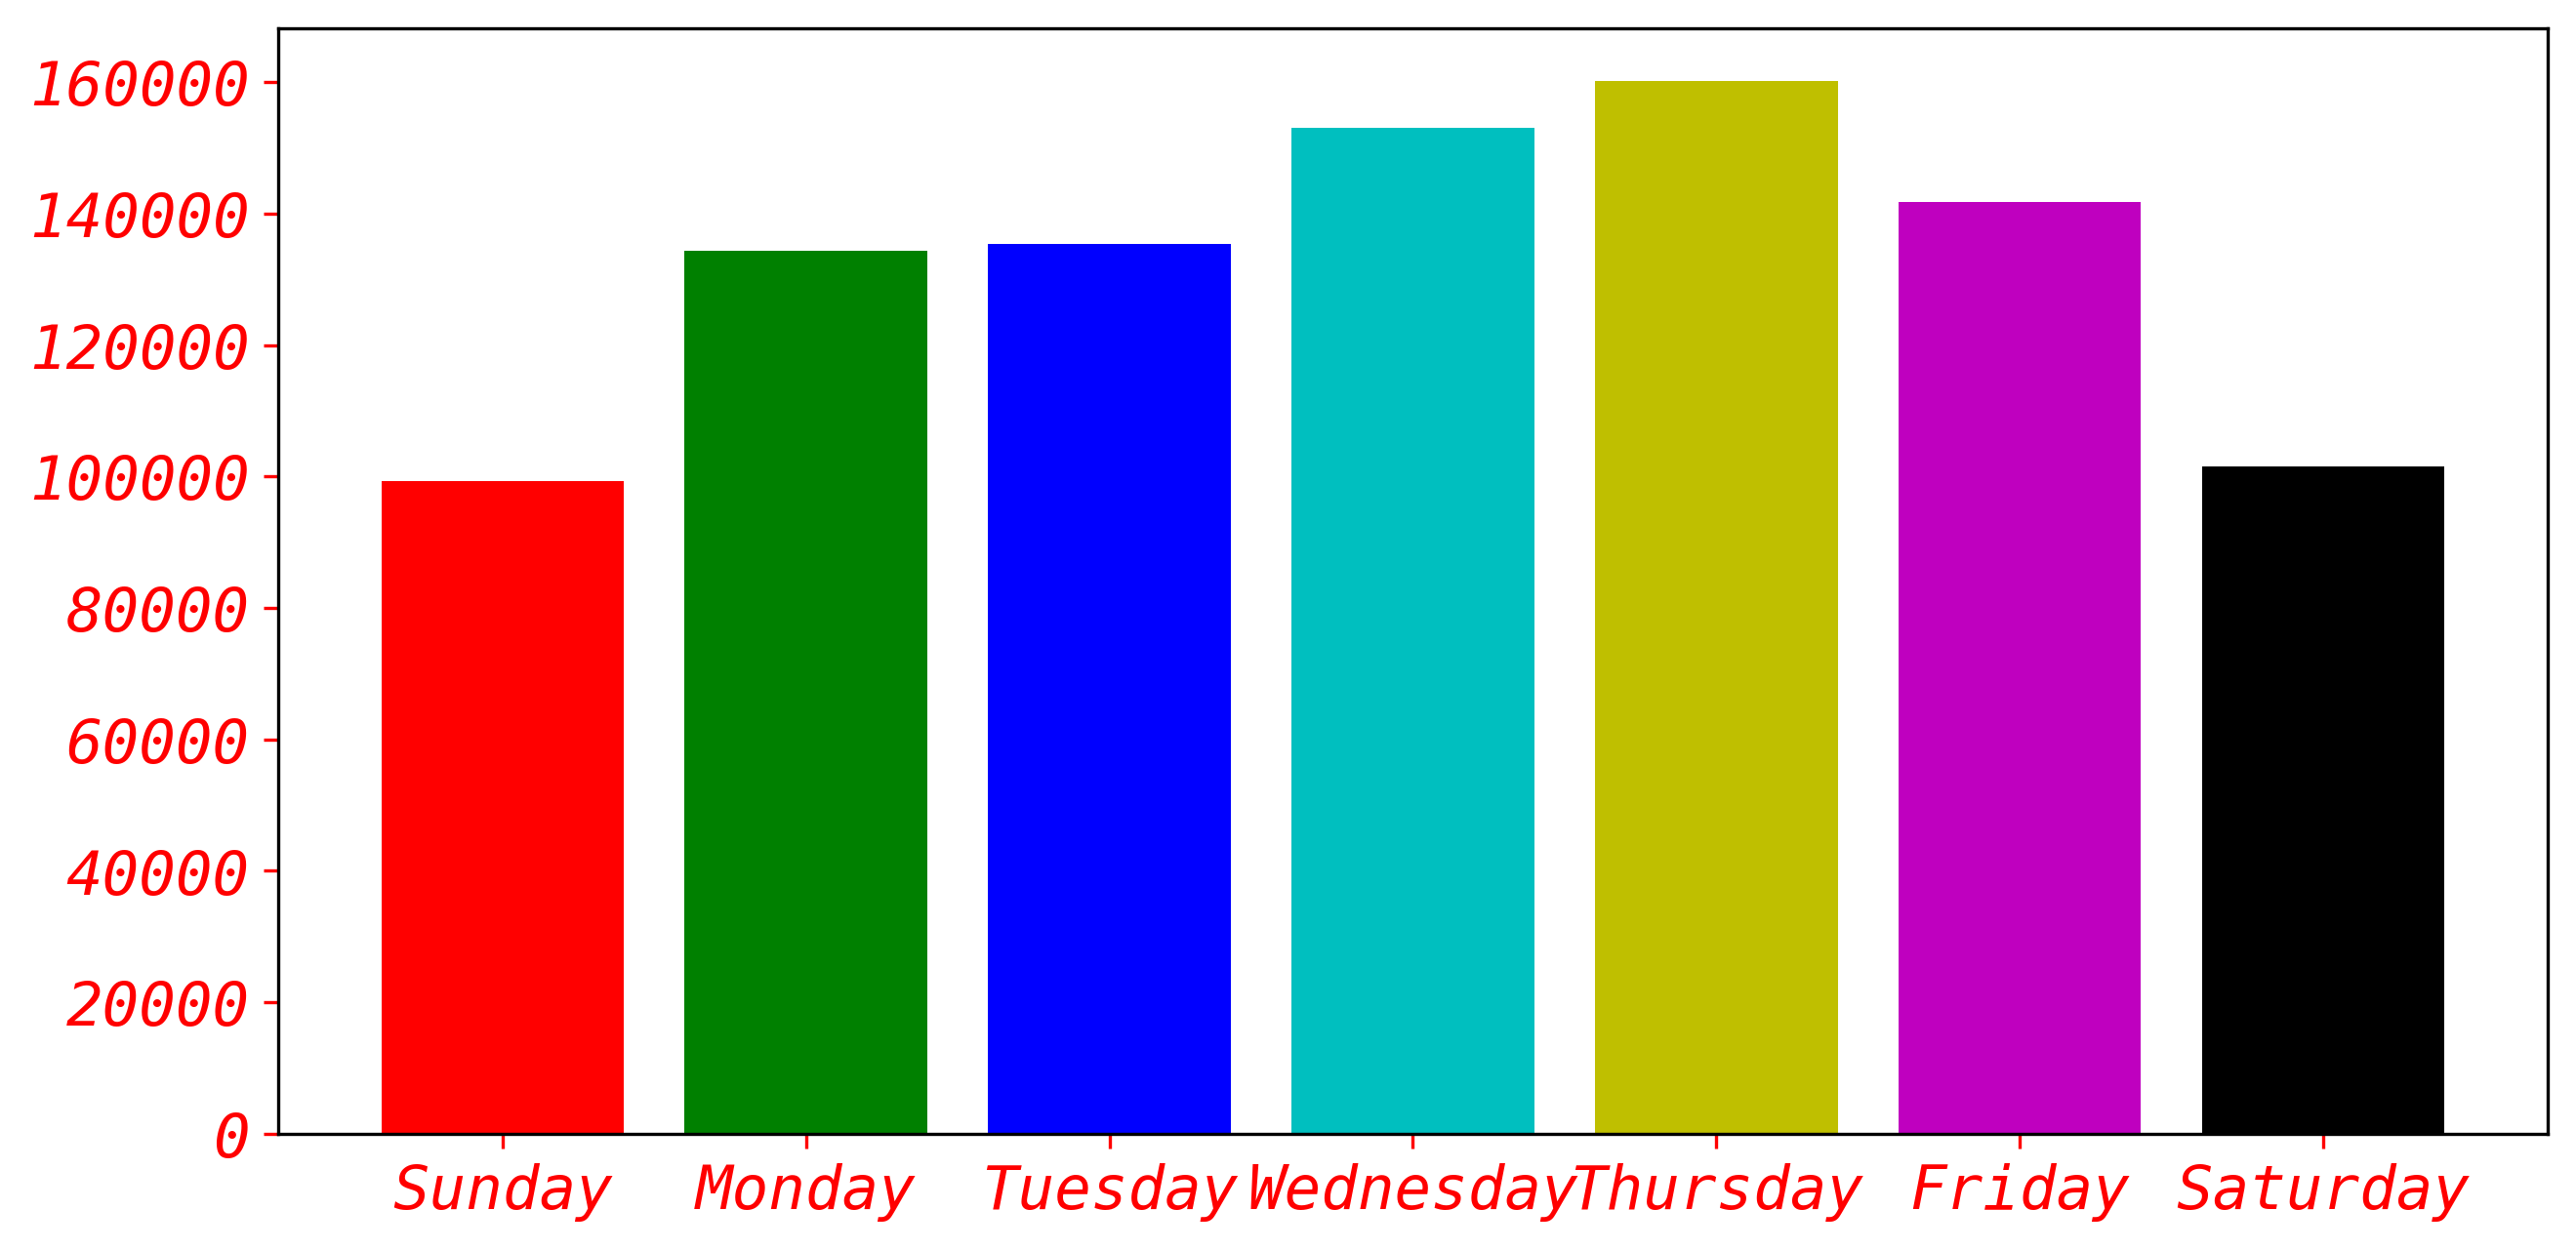

In [228]:
plt.bar(d.keys(), d.values(), color=['r', 'g', 'b', 'c', 'y', 'm', 'k'])

In [223]:
df

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,99310,134298,135305,152972,160131,141771,101578
1,99310,134298,135305,152972,160131,141771,101578
2,99310,134298,135305,152972,160131,141771,101578
3,99310,134298,135305,152972,160131,141771,101578
4,99310,134298,135305,152972,160131,141771,101578
5,99310,134298,135305,152972,160131,141771,101578
6,99310,134298,135305,152972,160131,141771,101578


##### Coninuation


    Mege/Join/Append

    Missing Value

    Time Series

    Stats

    Apply

    Map

    GroupBy

    Pivot Table



##### Data set

In [230]:
tip = sns.load_dataset('tips')

In [232]:
tip['total_bill'].mean()

19.785942622950824

In [235]:
tip[tip['total_bill'] > 19.78][['total_bill', 'tip']].describe()

,total_bill,tip
count,99.000000,99.000000
mean,28.251313,3.924545
std,7.598088,1.515910
min,19.810000,1.170000
25%,22.455000,3.000000
50%,25.890000,3.550000
75%,32.125000,5.000000
max,50.810000,10.000000
